<a href="https://colab.research.google.com/github/shekharkshitij/Deep_Learning/blob/main/DL(Lab03).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Ques 1:Implement CNN with any 2 datasets and compare results with ANN.**

In [1]:
pip install tensorflow keras numpy matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load MNIST
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = datasets.mnist.load_data()
x_train_mnist = x_train_mnist.reshape((x_train_mnist.shape[0], 28, 28, 1)).astype('float32') / 255
x_test_mnist = x_test_mnist.reshape((x_test_mnist.shape[0], 28, 28, 1)).astype('float32') / 255
y_train_mnist = to_categorical(y_train_mnist)
y_test_mnist = to_categorical(y_test_mnist)

# Load CIFAR-10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = datasets.cifar10.load_data()
x_train_cifar = x_train_cifar.astype('float32') / 255
x_test_cifar = x_test_cifar.astype('float32') / 255
y_train_cifar = to_categorical(y_train_cifar)
y_test_cifar = to_categorical(y_test_cifar)


In [4]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [5]:
def create_ann_model(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [6]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=10):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=2)
    return history

# MNIST
cnn_mnist = create_cnn_model((28, 28, 1), 10)
ann_mnist = create_ann_model((28, 28, 1), 10)
history_cnn_mnist = train_and_evaluate(cnn_mnist, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist)
history_ann_mnist = train_and_evaluate(ann_mnist, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist)

# CIFAR-10
cnn_cifar = create_cnn_model((32, 32, 3), 10)
ann_cifar = create_ann_model((32, 32, 3), 10)
history_cnn_cifar = train_and_evaluate(cnn_cifar, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar)
history_ann_cifar = train_and_evaluate(ann_cifar, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 13s - 7ms/step - accuracy: 0.9584 - loss: 0.1390 - val_accuracy: 0.9814 - val_loss: 0.0573
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9865 - loss: 0.0451 - val_accuracy: 0.9866 - val_loss: 0.0431
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9889 - val_loss: 0.0348
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9900 - val_loss: 0.0354
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9868 - val_loss: 0.0425
Epoch 6/10
1875/1875 - 5s - 2ms/step - accuracy: 0.9956 - loss: 0.0135 - val_accuracy: 0.9903 - val_loss: 0.0334
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9968 - loss: 0.0110 - val_accuracy: 0.9898 - val_loss: 0.0350
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9968 - loss: 0.0088 - val_accuracy: 0.9880 - val_loss: 0.0510
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 0.9902 -

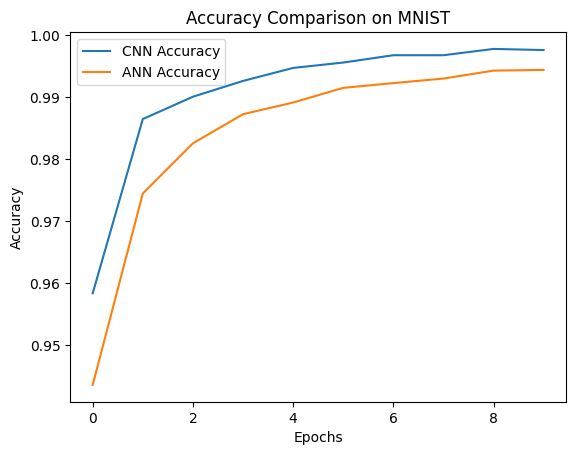

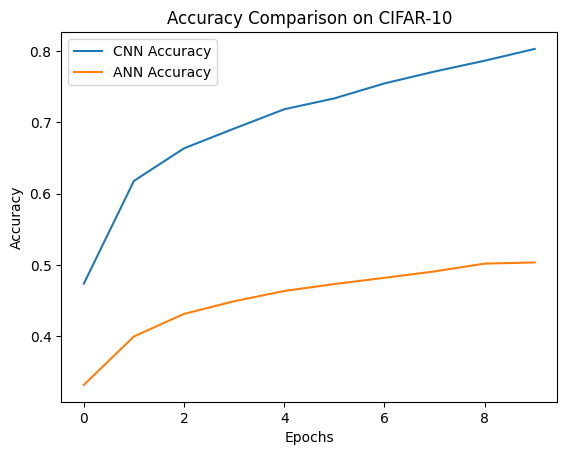

In [7]:
def plot_accuracy(history_cnn, history_ann, dataset_name):
    plt.plot(history_cnn.history['accuracy'], label='CNN Accuracy')
    plt.plot(history_ann.history['accuracy'], label='ANN Accuracy')
    plt.title(f'Accuracy Comparison on {dataset_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history_cnn_mnist, history_ann_mnist, 'MNIST')
plot_accuracy(history_cnn_cifar, history_ann_cifar, 'CIFAR-10')


##**Ques 2: Compare Transfer Learning and Fine Tuning with any 3 pre-trained models on 2 image datasets:**

###Dataset 1: Cats vs Dogs

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import os

# Loading datasets
# Cats vs. Dogs dataset
cats_vs_dogs_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=cats_vs_dogs_url, extract=True)
cats_vs_dogs_path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# Flowers dataset
flowers_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
path_to_flowers = tf.keras.utils.get_file('flower_photos.tgz', origin=flowers_url, extract=True)
flowers_path = os.path.join(os.path.dirname(path_to_flowers), 'flower_photos')

# Data generators
def create_data_generators(dataset_path, img_size, batch_size):
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = train_datagen.flow_from_directory(
        dataset_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        dataset_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

# Creating data generators for both datasets
img_size = (150, 150)
batch_size = 32

cats_vs_dogs_train, cats_vs_dogs_val = create_data_generators(cats_vs_dogs_path, img_size, batch_size)
flowers_train, flowers_val = create_data_generators(flowers_path, img_size, batch_size)

# Function to create model
def create_model(base_model, num_classes=1):
    base_model.trainable = False
    inputs = tf.keras.Input(shape=(150, 150, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='sigmoid' if num_classes == 1 else 'softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

# Function to compile and train model
def compile_and_train(model, train_generator, validation_generator, epochs=5):
    model.compile(
        optimizer=optimizers.Adam(),
        loss='binary_crossentropy' if model.output_shape[-1] == 1 else 'sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)
    return history

# Loading pre-trained models
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Transfer Learning
# Freeze the convolutional base
vgg16_base.trainable = False
resnet50_base.trainable = False
inceptionv3_base.trainable = False

# Creating models for Transfer Learning
vgg16_model_transfer = create_model(vgg16_base)
resnet50_model_transfer = create_model(resnet50_base)
inceptionv3_model_transfer = create_model(inceptionv3_base)

# Training models on Cats vs. Dogs dataset using Transfer Learning
print("Transfer Learning with VGG16 on Cats vs. Dogs dataset")
vgg16_history_transfer = compile_and_train(vgg16_model_transfer, cats_vs_dogs_train, cats_vs_dogs_val)

print("Transfer Learning with ResNet50 on Cats vs. Dogs dataset")
resnet50_history_transfer = compile_and_train(resnet50_model_transfer, cats_vs_dogs_train, cats_vs_dogs_val)

print("Transfer Learning with InceptionV3 on Cats vs. Dogs dataset")
inceptionv3_history_transfer = compile_and_train(inceptionv3_model_transfer, cats_vs_dogs_train, cats_vs_dogs_val)

# Fine Tuning
# Unfreeze some of the top layers of the convolutional base
vgg16_base.trainable = True
for layer in vgg16_base.layers[:-4]:
    layer.trainable = False

resnet50_base.trainable = True
for layer in resnet50_base.layers[:-4]:
    layer.trainable = False

inceptionv3_base.trainable = True
for layer in inceptionv3_base.layers[:-4]:
    layer.trainable = False

# Creating models for Fine Tuning
vgg16_model_fine_tune = create_model(vgg16_base)
resnet50_model_fine_tune = create_model(resnet50_base)
inceptionv3_model_fine_tune = create_model(inceptionv3_base)

# Training models on Cats vs. Dogs dataset using Fine Tuning
print("Fine Tuning with VGG16 on Cats vs. Dogs dataset")
vgg16_history_fine_tune = compile_and_train(vgg16_model_fine_tune, cats_vs_dogs_train, cats_vs_dogs_val)

print("Fine Tuning with ResNet50 on Cats vs. Dogs dataset")
resnet50_history_fine_tune = compile_and_train(resnet50_model_fine_tune, cats_vs_dogs_train, cats_vs_dogs_val)

print("Fine Tuning with InceptionV3 on Cats vs. Dogs dataset")
inceptionv3_history_fine_tune = compile_and_train(inceptionv3_model_fine_tune, cats_vs_dogs_train, cats_vs_dogs_val)

# Evaluating models
def evaluate_model(model, validation_generator):
    return model.evaluate(validation_generator)

print("Evaluating Transfer Learning models on Cats vs. Dogs dataset")
vgg16_eval_transfer = evaluate_model(vgg16_model_transfer, cats_vs_dogs_val)
resnet50_eval_transfer = evaluate_model(resnet50_model_transfer, cats_vs_dogs_val)
inceptionv3_eval_transfer = evaluate_model(inceptionv3_model_transfer, cats_vs_dogs_val)

print("Evaluating Fine Tuning models on Cats vs. Dogs dataset")
vgg16_eval_fine_tune = evaluate_model(vgg16_model_fine_tune, cats_vs_dogs_val)
resnet50_eval_fine_tune = evaluate_model(resnet50_model_fine_tune, cats_vs_dogs_val)
inceptionv3_eval_fine_tune = evaluate_model(inceptionv3_model_fine_tune, cats_vs_dogs_val)

print(f"Transfer Learning VGG16 Accuracy: {vgg16_eval_transfer[1]}")
print(f"Transfer Learning ResNet50 Accuracy: {resnet50_eval_transfer[1]}")
print(f"Transfer Learning InceptionV3 Accuracy: {inceptionv3_eval_transfer[1]}")
print(f"Fine Tuning VGG16 Accuracy: {vgg16_eval_fine_tune[1]}")
print(f"Fine Tuning ResNet50 Accuracy: {resnet50_eval_fine_tune[1]}")
print(f"Fine Tuning InceptionV3 Accuracy: {inceptionv3_eval_fine_tune[1]}")

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Transfer Learning with VGG16 on Cats vs. Dogs dataset
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.4754 - loss: 0.8170 - val_accuracy: 0.6650 - val_loss: 0.6407
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.6659 - loss: 0.6438 - val_accuracy: 0.6667 - val_loss: 0.6399
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.6630 - loss: 0.6454 - val_accuracy: 0.6667 - val_loss: 0.6404
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.6838 - loss: 0.6261 - val_accuracy: 0.6650 - val_loss: 0.6425
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.6851 - loss: 0.6246 - val_accuracy: 0.6667 - val_loss: 0.6419
Transfer Learning with ResNet50 on Cats vs. Dogs dataset
Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 218ms/step - accuracy: 0.6629 - loss: 0.6451 - val_accuracy: 0.6667 - val_loss: 0.6423
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.6773 - loss: 0.6315 - val_accuracy: 0.6667 - val_loss: 0.6378
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.6

###Dataset 2: CIFAR-10

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
import numpy as np

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Resize images to 75x75 for InceptionV3
train_images_resized = np.array([tf.image.resize(image, (75, 75)) for image in train_images])
test_images_resized = np.array([tf.image.resize(image, (75, 75)) for image in test_images])

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Data generators
def create_data_generators(train_images, train_labels, test_images, test_labels, img_size, batch_size):
    train_datagen = ImageDataGenerator(validation_split=0.2)

    train_generator = train_datagen.flow(
        train_images,
        train_labels,
        batch_size=batch_size,
        subset='training'
    )

    validation_generator = train_datagen.flow(
        train_images,
        train_labels,
        batch_size=batch_size,
        subset='validation'
    )

    test_generator = ImageDataGenerator().flow(test_images, test_labels, batch_size=batch_size)

    return train_generator, validation_generator, test_generator

# Creating data generators for 32x32 images
img_size = (32, 32)
batch_size = 32

train_generator, val_generator, test_generator = create_data_generators(train_images, train_labels, test_images, test_labels, img_size, batch_size)

# Creating data generators for 75x75 images
img_size_resized = (75, 75)
train_generator_resized, val_generator_resized, test_generator_resized = create_data_generators(train_images_resized, train_labels, test_images_resized, test_labels, img_size_resized, batch_size)

# Function to create model
def create_model(base_model, num_classes=10):
    base_model.trainable = False
    inputs = tf.keras.Input(shape=base_model.input_shape[1:])
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

# Function to compile and train model
def compile_and_train(model, train_generator, validation_generator, epochs=5):
    model.compile(
        optimizer=optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)
    return history

# Loading pre-trained models
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Transfer Learning
# Freeze the convolutional base
vgg16_base.trainable = False
resnet50_base.trainable = False
inceptionv3_base.trainable = False

# Creating models for Transfer Learning
vgg16_model_transfer = create_model(vgg16_base)
resnet50_model_transfer = create_model(resnet50_base)
inceptionv3_model_transfer = create_model(inceptionv3_base)

# Training models on CIFAR-10 dataset using Transfer Learning
print("Transfer Learning with VGG16 on CIFAR-10 dataset")
vgg16_history_transfer = compile_and_train(vgg16_model_transfer, train_generator, val_generator)

print("Transfer Learning with ResNet50 on CIFAR-10 dataset")
resnet50_history_transfer = compile_and_train(resnet50_model_transfer, train_generator, val_generator)

print("Transfer Learning with InceptionV3 on CIFAR-10 dataset")
inceptionv3_history_transfer = compile_and_train(inceptionv3_model_transfer, train_generator_resized, val_generator_resized)

# Fine Tuning
# Unfreeze some of the top layers of the convolutional base
vgg16_base.trainable = True
for layer in vgg16_base.layers[:-4]:
    layer.trainable = False

resnet50_base.trainable = True
for layer in resnet50_base.layers[:-4]:
    layer.trainable = False

inceptionv3_base.trainable = True
for layer in inceptionv3_base.layers[:-4]:
    layer.trainable = False

# Creating models for Fine Tuning
vgg16_model_fine_tune = create_model(vgg16_base)
resnet50_model_fine_tune = create_model(resnet50_base)
inceptionv3_model_fine_tune = create_model(inceptionv3_base)

# Training models on CIFAR-10 dataset using Fine Tuning
print("Fine Tuning with VGG16 on CIFAR-10 dataset")
vgg16_history_fine_tune = compile_and_train(vgg16_model_fine_tune, train_generator, val_generator)

print("Fine Tuning with ResNet50 on CIFAR-10 dataset")
resnet50_history_fine_tune = compile_and_train(resnet50_model_fine_tune, train_generator, val_generator)

print("Fine Tuning with InceptionV3 on CIFAR-10 dataset")
inceptionv3_history_fine_tune = compile_and_train(inceptionv3_model_fine_tune, train_generator_resized, val_generator_resized)

# Evaluating models
def evaluate_model(model, test_generator):
    return model.evaluate(test_generator)

print("Evaluating Transfer Learning models on CIFAR-10 dataset")
vgg16_eval_transfer = evaluate_model(vgg16_model_transfer, test_generator)
resnet50_eval_transfer = evaluate_model(resnet50_model_transfer, test_generator)
inceptionv3_eval_transfer = evaluate_model(inceptionv3_model_transfer, test_generator_resized)

print("Evaluating Fine Tuning models on CIFAR-10 dataset")
vgg16_eval_fine_tune = evaluate_model(vgg16_model_fine_tune, test_generator)
resnet50_eval_fine_tune = evaluate_model(resnet50_model_fine_tune, test_generator)
inceptionv3_eval_fine_tune = evaluate_model(inceptionv3_model_fine_tune, test_generator_resized)

print(f"Transfer Learning VGG16 Accuracy: {vgg16_eval_transfer[1]}")
print(f"Transfer Learning ResNet50 Accuracy: {resnet50_eval_transfer[1]}")
print(f"Transfer Learning InceptionV3 Accuracy: {inceptionv3_eval_transfer[1]}")
print(f"Fine Tuning VGG16 Accuracy: {vgg16_eval_fine_tune[1]}")
print(f"Fine Tuning ResNet50 Accuracy: {resnet50_eval_fine_tune[1]}")
print(f"Fine Tuning InceptionV3 Accuracy: {inceptionv3_eval_fine_tune[1]}")


Transfer Learning with VGG16 on CIFAR-10 dataset
Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3882 - loss: 1.7829 - val_accuracy: 0.5318 - val_loss: 1.3895
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.5331 - loss: 1.3658 - val_accuracy: 0.5519 - val_loss: 1.3058
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5579 - loss: 1.2800 - val_accuracy: 0.5727 - val_loss: 1.2576
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5744 - loss: 1.2399 - val_accuracy: 0.5790 - val_loss: 1.2354
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5838 - loss: 1.2186 - val_accuracy: 0.5888 - val_loss: 1.2127
Transfer Learning with ResNet50 on CIFAR-10 dataset
Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.1876 - loss: 2.2267 - val_accuracy: 0.3051 - val_loss: 1.9573
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.2886 - loss: 1.9604 - val_accuracy: 0.3005 - val